In [1]:
import numpy as np 
import pandas as pd 
import os 
import geopandas as gpd
from matplotlib import pyplot as plt
data_path = '/home/tandonsa/PycharmProjects/github_sam991/Leveraging-GPS-Data-for-Machine-Learning/Data/data'

In [2]:
# read the data from shapefiles,Geopackage Geojson etc. 
shp = os.path.join(data_path,'countries.shp')
countries = gpd.read_file(shp)

print("shape of data ",countries.shape)
countries.head(3)

shape of data  (255, 12)


,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<Figure size 864x1080 with 0 Axes>

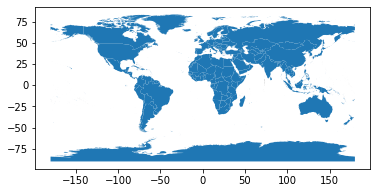

In [16]:
plt.figure(figsize=(12,15))
countries.plot()

## Read the CSV data

In [20]:
csv_file = os.path.join(data_path,"acled2019.csv")
df = pd.read_csv(csv_file)
print('Data Frame shape :',df.shape)
df.head(3)

Data Frame shape : (198761, 31)


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM


### Convert to Lat-Long into XY using points_from_xy()
*  Convert the Lat-Long co-ordinates into x-y using points_from_xy() to transform Longitude and Latitude into list of sahpely. 


In [22]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
gdf.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


<Figure size 864x1080 with 0 Axes>

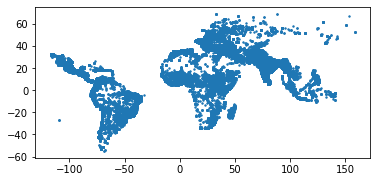

In [26]:
plt.figure(figsize=(12,15))
gdf.plot(markersize=2)

## Writing the data into Spartial format

### write to Shapefile

In [28]:
gdf.to_file(os.path.join(data_path,'acled2019.shp'),crs={'init':'epsg:4326'}) # shape file and Cordinate ref 


/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


### Write to GeoJson

In [29]:
gdf.to_file(os.path.join(data_path,'acled2019-Geojson.geojson'),driver='GeoJSON')

## Reading the Subset 

to read the subset of the data , in geo pandas we can filter the data with geometry bounding box or rows

In [3]:
## read countries data frame 
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Reading subset of the data in geometry 
countries[countries['CONTINENT']== "Africa"].head(4)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
13,Ethiopia,105350020,174700.0,2017,2007,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
14,S. Sudan,13026129,20880.0,2017,2008,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((35.92084 4.61933, 35.85654 4.61960, ..."
15,Somalia,7531386,4719.0,2017,1987,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
16,Kenya,47615739,152700.0,2017,2009,2016,5. Emerging region: G20,5. Low income,Africa,Africa,Eastern Africa,"MULTIPOLYGON (((34.38119 4.62016, 34.45967 4.6..."


* Mask  --> while reading the data , we can filter out by geometry using mask parameter

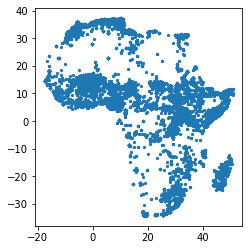

In [11]:
africa_acled = gpd.read_file(os.path.join(data_path,'acled2019.shp'),mask= countries[countries['CONTINENT']=='Africa'])
africa_acled.plot(markersize=5)

In [8]:
# Reading subset of the data in geometry 
countries[countries['CONTINENT']== "Asia"].head(4)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
6,Dhekelia,7850,314.0,2013,-99,2013,2. Developed region: nonG7,2. High income: nonOECD,Asia,Asia,Western Asia,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Cyprus,1221549,29260.0,2017,2001,2016,6. Developing region,2. High income: nonOECD,Asia,Asia,Western Asia,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."


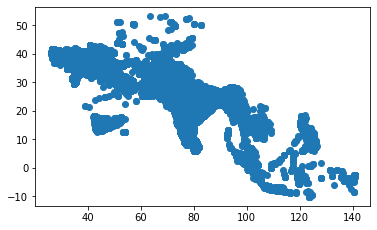

In [14]:
asia_acled = gpd.read_file(os.path.join(data_path,'acled2019.shp'),mask=countries[countries['CONTINENT']=='Asia'])
asia_acled.plot()

## To read the subset 

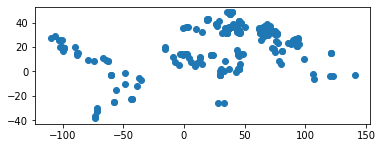

In [15]:
acled_subset = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=slice(200,500)) # we can add rows =200
acled_subset.plot()

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/fiona/collection.py:263: RuntimeWarning: Layer does not support OLC_FASTFEATURECOUNT, negative slices or start values other than zero may be slow.
  self, start, stop, step, bbox, mask)


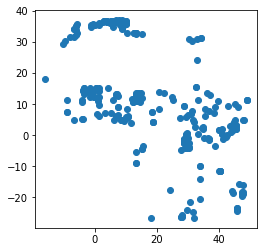

In [18]:
acled_subset2 = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=slice(200,500),mask=countries[countries['CONTINENT']=='Africa'])
acled_subset2.plot()

## Coordinate Ref. System

There are multiple co-ordinate system to map from sphere to 2D Plot.

In [19]:
# read the data from shapefiles,Geopackage Geojson etc. 
shp = os.path.join(data_path,'countries.shp')
countries = gpd.read_file(shp)

print("shape of data ",countries.shape)
countries.head(3)

shape of data  (255, 12)


,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [30]:
print(type(countries)) # Geo-data frame as it has geometry column
print(type(countries['NAME'])) # pandas Series 

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
## read conflicts data 
conflicts = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=500)
conflicts.head(4)


,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)


In [42]:
conflicts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
conflicts.crs.name

'WGS 84'

Different CRS have diff. measuremnts . For some , the co-ordinates are defined in decimal degrees while others are defined  in meters . Its common process to reproject data from one format to another in Geographic data processing 

Resource for getting the right projection http://spatialreference.org/

In [35]:
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [39]:
countries = countries[(countries.NAME !='Antarctica') & (countries.NAME != 'Fr. S. Antartica Lands')]
# project the data into Mercator Projection epsg=3395 used by google

countries_projected = countries.to_crs(epsg=3395)
countries_projected['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

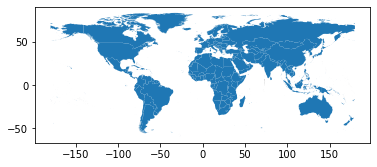

In [37]:
countries.plot()

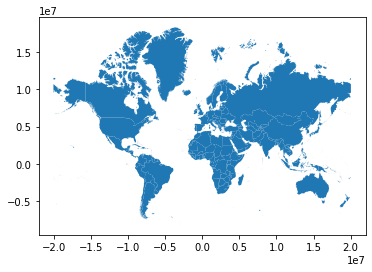

In [38]:
countries_projected.plot()

Notice the different scale of projected data . If we plot xy in different crs , data will not allign

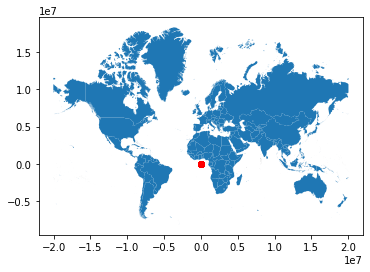

In [43]:
fig,ax = plt.subplots()
countries_projected.plot(ax=ax) # crs 3395 
conflicts.plot(ax=ax,color='red') # crs EPSG:4326

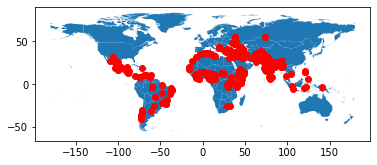

In [44]:
fig,ax = plt.subplots()
countries.plot(ax=ax) # crs 3395 
conflicts.plot(ax=ax,color='red') # crs 3395

In [45]:
conflicts_projected = conflicts

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)
